In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
path = 'data/processed'
benchmarks_df = pd.read_csv(os.path.join(path, 'a_benchmarks_2024-09-11.csv'))
schools_df = pd.read_csv(os.path.join(path, 'a_schools_2024-08-29.csv'))
courseSections_df = pd.read_csv(os.path.join(path, 'a_courseSections_2024-08-29.csv'))
courseSectionRosters_df = pd.read_csv(os.path.join(path, 'a_courseSectionRosters_2024-08-29.csv'))
scores_df = pd.read_csv(os.path.join(path, 'a_scores_2024-09-11.csv'))
vendorUsage_df = pd.read_csv(os.path.join(path, 'a_vendorUsage_2024-09-11.csv'))

/var/folders/w3/z8qntdcx62v2qmj6z9fwfhrh0000gp/T/ipykernel_9292/4073666699.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  courseSectionRosters_df = pd.read_csv(os.path.join(path, 'a_courseSectionRosters_2024-08-29.csv'))


# data exploration

## benchmarks

In [15]:
print("benchmarks_df")
print(benchmarks_df.shape)
print(benchmarks_df.columns)

benchmarks_df
(42, 5)
Index(['districtId', 'year', 'level', 'dataSource', 'value'], dtype='object')


In [16]:
benchmarks_df

,districtId,year,level,dataSource,value
0,45,2017,3,value_scantronMath,2356.0
1,45,2017,3,value_scantronReading,2563.0
2,45,2017,4,value_scantronMath,2493.0
3,45,2017,4,value_scantronReading,2674.0
4,45,2017,5,value_scantronMath,2584.0
5,45,2017,5,value_scantronReading,2841.0
6,45,2017,6,value_scantronMath,2675.0
7,45,2017,6,value_scantronReading,2897.0
8,45,2017,7,value_scantronMath,2766.0
9,45,2017,7,value_scantronReading,3008.0


## schools

In [17]:
print("schools_df")
print(schools_df.shape)
print(schools_df.columns)

schools_df
(20, 8)
Index(['id', 'name', 'districtId', 'costCenter', 'abbreviation',
       'acqRequestSelectable', 'oneRoster_sourcedId', 'oneRoster_ticketId'],
      dtype='object')


In [18]:
schools_df.dtypes

id                        int64
name                     object
districtId                int64
costCenter                int64
abbreviation             object
acqRequestSelectable      int64
oneRoster_sourcedId     float64
oneRoster_ticketId        int64
dtype: object

In [19]:
schools_df

,id,name,districtId,costCenter,abbreviation,acqRequestSelectable,oneRoster_sourcedId,oneRoster_ticketId
0,222,Elementary A,45,5,EES,1,NaN,0
1,223,Middle School A,45,8,EMS,1,NaN,0
2,224,High School A,45,10,ECHS,1,NaN,0
3,225,Junior High B,45,12,ECJH,1,NaN,0
4,226,Elementary School B,45,18,HES,1,NaN,0
5,227,Middle School C,45,19,HMS,1,NaN,0
6,228,High School B,45,20,HHS,1,NaN,0
7,229,Middle School D,45,23,MJH,1,NaN,0
8,230,Elementary School C,45,30,RSE,1,NaN,0
9,231,Elementary School D,45,35,CES,1,NaN,0


## courseSections

In [20]:
print("courseSections_df")
print(courseSections_df.shape)
print(courseSections_df.columns)

courseSections_df
(17662, 4)
Index(['id', 'vanityId', 'year', 'schoolId'], dtype='object')


In [21]:
courseSections_df.dtypes

id           int64
vanityId    object
year         int64
schoolId     int64
dtype: object

In [22]:
courseSections_df.head()

,id,vanityId,year,schoolId
0,40388,PE 4,2015,222
1,40389,READING 4,2015,222
2,40390,HmroomPK6,2015,222
3,40391,LANGUAGE 4,2015,222
4,40392,SCIENCE 4,2015,222


## courseSectionRosters

In [23]:
print("courseSectionRosters_df")
print(courseSectionRosters_df.shape)
print(courseSectionRosters_df.columns)

courseSectionRosters_df
(612241, 5)
Index(['id', 'courseSectionId', 'studentId', 'studentLevel', 'ticket'], dtype='object')


In [24]:
courseSectionRosters_df.dtypes

id                  int64
courseSectionId     int64
studentId           int64
studentLevel        int64
ticket             object
dtype: object

In [25]:
courseSectionRosters_df.head()

,id,courseSectionId,studentId,studentLevel,ticket
0,1047696,39975,45333,4,NaN
1,1047704,39975,56116,4,NaN
2,1047706,39975,45345,4,NaN
3,1047715,39975,45400,4,NaN
4,1047729,39975,45413,4,NaN


In [26]:
if 'vanityId' not in courseSectionRosters_df.columns:
    courseSectionRosters_df = pd.merge(courseSectionRosters_df, courseSections_df[['id', 'vanityId']], left_on='courseSectionId', right_on='id', how='left')
    courseSectionRosters_df = courseSectionRosters_df.drop(columns=['id_y'])
    courseSectionRosters_df = courseSectionRosters_df.rename(columns={'id_x': 'id'})

courseSectionRosters_df.head()

,id,courseSectionId,studentId,studentLevel,ticket,vanityId
0,1047696,39975,45333,4,NaN,MathGrade 4
1,1047704,39975,56116,4,NaN,MathGrade 4
2,1047706,39975,45345,4,NaN,MathGrade 4
3,1047715,39975,45400,4,NaN,MathGrade 4
4,1047729,39975,45413,4,NaN,MathGrade 4


In [27]:
courseSectionRosters_df['studentLevel'].value_counts()

studentLevel
10    54246
9     52595
7     51315
1     49253
4     49171
8     48846
2     48820
12    47993
3     47529
11    47342
5     41209
6     40529
0     28458
99     2930
98     1290
97      670
96       45
Name: count, dtype: int64

In [28]:
list(courseSectionRosters_df['vanityId'].unique())

['MathGrade 4',
 'MathGrade 3',
 'SOC ST 4',
 'SCIENCE 4',
 'PE 4',
 'READING 4',
 'LANGUAGE 4',
 'SCIENCE 3',
 'SOC ST 3',
 'PE 3',
 'READING 3',
 'LANGUAGE 3',
 'AAS:Read-4',
 'AAS:Math-4',
 'AAS:Math-3',
 'AAS:Read-3',
 'PE 2',
 'SOC ST 2',
 'HOMEROOM',
 'SCIENCE 2',
 'LANGUAGE 2',
 'MATH 2',
 'READING 2',
 'PE 1',
 'READING 1',
 'SCIENCE 1',
 'LANGUAGE 1',
 'MATH 1',
 'SOC SCI 1',
 'READING K',
 'PE K',
 'HmroomPK6',
 'MATH 4',
 'MATH 3',
 'SOC ST 1',
 'Algebra IH',
 'MathGrade 5',
 'STUDY HALL',
 'Eng 8 H/Adv',
 'Advisory 8',
 'CONTISS 7-8',
 'WLDHIS H/Adv',
 'CareerPrep-A',
 'PhySci8H/Adv',
 'PE 8',
 'PhySci Gr 8',
 'MATH8 PREALG',
 'English Gr 8',
 'WLDHIS 1500',
 'ContIssu 7-8',
 'StuAide7-8NC',
 'English LA 5',
 'PE 5',
 'Science Gr 5',
 'SocialStuGr5',
 'Math6H/Adv',
 'SciGr6H/A',
 'ELAGrPK6H/Ad',
 'SoSt6H/A',
 'PE 6',
 'MATHINVET7-8',
 'MATH 7',
 'LANG ARTS 7',
 'PE 7',
 'SCIENCE LI 7',
 'Geog Gr7',
 'CivicsGr 7',
 'Advisory 7',
 'EnricMath78',
 'LifeSciH Gr7',
 'GeogH/AdvGr

In [29]:
# Group by vanityId (course name) and courseSectionId, then count students
course_sizes = courseSectionRosters_df.groupby(['vanityId', 'courseSectionId'])['studentId'].count().reset_index()

# Calculate average size for each course
average_course_sizes = pd.DataFrame(course_sizes.groupby('vanityId')['studentId'].mean().sort_values(ascending=False))

# Display the results
average_course_sizes.head(50)

,studentId
vanityId,
District Wide - IS,26829.750000
District Wide - ISS,26829.750000
District Wide - GA,11543.333333
Schoolwide -237sID,1490.750000
Schoolwide -229sID,1231.000000
Schoolwide -236sID,1182.000000
Schoolwide -233sID,1140.000000
Schoolwide -235sID,992.250000
Schoolwide -231sID,970.250000


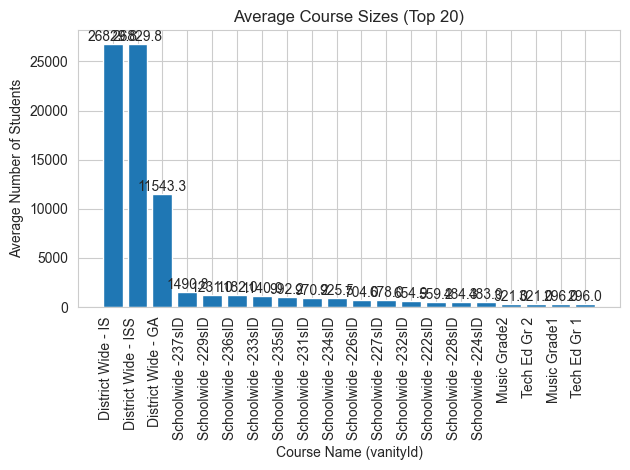

In [30]:

average_course_sizes_sorted = average_course_sizes.sort_values('studentId', ascending=False)

# TODO: Cut out the district wide / school wide
top_20_courses = average_course_sizes_sorted.head(20)

plt.bar(top_20_courses.index, top_20_courses['studentId'])

plt.title('Average Course Sizes (Top 20)')
plt.xlabel('Course Name (vanityId)')
plt.ylabel('Average Number of Students')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

for i, v in enumerate(top_20_courses['studentId']):
    plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')

In [31]:
# print number of times each student appears
student_counts = scores_df['studentId'].value_counts()
print(student_counts)
print(student_counts.describe())

studentId
86584     7
86664     7
86590     7
86411     7
86669     7
         ..
204150    1
204151    1
204152    1
204153    1
259514    1
Name: count, Length: 125223, dtype: int64
count    125223.000000
mean          2.425673
std           1.471574
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           7.000000
Name: count, dtype: float64


## scores

In [32]:
scores_df.dtypes

studentId               int64
studentLevel            int64
year                    int64
measurementTypeId       int64
subgroup_specialEd      int64
                        ...  
value_gcaInfo           int64
value_gcaNar            int64
value_gcaOpin           int64
value_aimsWebMath       int64
value_aimsWebReading    int64
Length: 69, dtype: object

In [33]:
scores_df.head()

,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,...,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading
0,44774,9,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,44774,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,44774,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44775,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44775,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
pd.set_option('display.max_columns', None)

In [35]:
print('scores_df')
print(scores_df.shape)
print(scores_df.columns)

scores_df
(303750, 69)
Index(['studentId', 'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25',
       'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
       'value_nweaReading', 'value_nweaEnglish', 'value_iReadyMath',
       'value_iReadyReading', 'value_actMasteryComposite',
       'value_actMasteryReading', 'value_actMasteryMath',
       'value_actMasteryScience', 'value_actMasteryEnglish', 'value_nweaELA',
       'value_scantronMath', 'value_scantronReading', 'value_mapMath',
       'value_mapEnglish', 'value_mapReading', 'value_mapRLA',
       'value_scantronScience', 'value_scantronLanguage',
       'value_ReadingFoundations', 'value_scantronAlgebra', 'value_eocMath',
       'value_actELAScore', 'value_mapScience', 'value_LeapELAScale',
       'value_L

In [36]:
# convert dtype to numeric
int_columns = ['studentId', 'studentLevel', 'year', 'measurementTypeId'] + [col for col in scores_df.columns if col.startswith('subgroup_')]
for col in int_columns:
    scores_df[col] = pd.to_numeric(scores_df[col], errors='coerce').astype('int64')

value_columns = [col for col in scores_df.columns if col.startswith('value_')]
for col in value_columns:
    scores_df[col] = pd.to_numeric(scores_df[col], errors='coerce').astype('float64')

scores_df.dtypes

studentId                 int64
studentLevel              int64
year                      int64
measurementTypeId         int64
subgroup_specialEd        int64
                         ...   
value_gcaInfo           float64
value_gcaNar            float64
value_gcaOpin           float64
value_aimsWebMath       float64
value_aimsWebReading    float64
Length: 69, dtype: object

In [37]:
print(f"specialEd {scores_df['subgroup_specialEd'].nunique()}")
print(f"lunchStatus {scores_df['subgroup_lunchStatus'].nunique()}")
print(f"gender {scores_df['subgroup_gender'].nunique()}")
print(f"ethnicity {scores_df['subgroup_ethnicity'].nunique()}")
print(f"ell {scores_df['subgroup_ell'].nunique()}")
print(f"bottom25 {scores_df['subgroup_bottom25'].nunique()}")


specialEd 6
lunchStatus 5
gender 5
ethnicity 5
ell 2
bottom25 2


In [38]:
subgroups = ['subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender', 'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25']

for subgroup in subgroups:
    print(f"\n{subgroup} value counts:")
    print(scores_df[subgroup].value_counts())
    print(f"Total unique values: {scores_df[subgroup].nunique()}")


subgroup_specialEd value counts:
subgroup_specialEd
0       290283
7         8212
6         4296
1          899
2           47
1000        13
Name: count, dtype: int64
Total unique values: 6

subgroup_lunchStatus value counts:
subgroup_lunchStatus
0    282087
1      9120
5      6268
6      6240
3        35
Name: count, dtype: int64
Total unique values: 5

subgroup_gender value counts:
subgroup_gender
0    289238
5      6422
6      6086
4      1774
3       230
Name: count, dtype: int64
Total unique values: 5

subgroup_ethnicity value counts:
subgroup_ethnicity
0     289238
18      8632
17      3876
10      1872
9        132
Name: count, dtype: int64
Total unique values: 5

subgroup_ell value counts:
subgroup_ell
0    303746
3         4
Name: count, dtype: int64
Total unique values: 2

subgroup_bottom25 value counts:
subgroup_bottom25
0    298640
1      5110
Name: count, dtype: int64
Total unique values: 2


In [39]:
scores_df['studentLevel'].value_counts()

studentLevel
 4     39257
 5     39053
 3     38960
 6     38309
 7     37406
 8     36716
 2     17089
 10    13941
 9     13388
 11    11835
 1      8208
 0      5333
 12     3254
 98      654
 99      275
 97       59
 96        9
-1         4
Name: count, dtype: int64

In [40]:
# remove columns that only contain zeros
scores_df = scores_df.loc[:, (scores_df != 0).any()]
scores_df.shape

(303750, 58)

In [41]:
scores_df.describe()

,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,value_actMathScore,value_actEnglishScore,value_actReadingScore,value_actScienceScore,value_actCompositeScore,value_nweaMath,value_nweaReading,value_iReadyMath,value_iReadyReading,value_actMasteryComposite,value_actMasteryReading,value_actMasteryMath,value_actMasteryScience,value_actMasteryEnglish,value_nweaELA,value_scantronMath,value_scantronReading,value_mapMath,value_mapReading,value_mapRLA,value_scantronScience,value_scantronLanguage,value_ReadingFoundations,value_actELAScore,value_mapScience,value_LeapELAScale,value_LeapMathScale,value_LeapALScale,value_LeapE2Scale,value_LeapGmScale,value_LeapBlScale,value_LeapE3Scale,value_LeapUsScale,value_E1Scale,value_UsEsScale,value_accessReadingScale,value_accessReadingProficiency,value_accessCompositeScale,value_accesscompositeProficiency,value_dibelsReading,value_mapHistory,value_LEAPSocSci,value_MathMilestones,value_ELAMilestones,value_starReading,value_starMath,value_ScienceMilestones,value_SocialMilestones
count,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,253260.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000
mean,131440.302008,6.004998,2017.208234,2.757402,0.320174,0.256807,0.251562,0.793995,0.000040,0.016823,0.302838,0.297587,0.314677,0.310802,0.315253,16.406140,9.551638,25.415608,28.923687,0.014973,0.014347,0.015141,0.014779,0.015022,6.267480,1353.753873,1184.379088,24.613557,5.823842,18.694933,18.151335,22.339154,7.818683,0.008793,1.232902,107.269761,102.016665,7.949870,7.327658,7.663407,5.935779,6.001373,3.486887,6.552471,0.039272,0.518805,0.005376,0.510910,0.005271,1.627549,0.493528,58.640863,76.930199,72.340833,4.174281,86.041310,26.027691,26.343312
std,57982.885934,5.916790,10.375606,1.281897,6.673339,1.104788,1.134392,3.593934,0.010887,0.128608,2.334394,2.362907,2.483732,2.420651,2.418425,77.792264,43.052760,104.131783,120.020451,0.535933,0.522532,0.537850,0.530502,0.552539,63.973843,1247.204244,1346.178817,127.977722,61.696352,112.417341,215.191523,240.671880,139.455533,0.399529,24.358031,263.705178,256.420889,76.579856,73.894697,74.940800,64.739801,65.428454,50.162285,70.206616,5.107435,13.029753,0.144590,12.754386,0.134692,18.322074,17.891981,200.266543,184.741639,178.897702,48.159151,446.624951,113.742834,113.992499
min,44774.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,85484.000000,4.000000,2017.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

## vendors

In [42]:
vendorUsage_df.head()

,id,vendorId,studentId,active,year,usageTypeId,weeklyUsageMinutes
0,11890,72609,44777,0,2018,1,0
1,11891,72609,44783,0,2018,1,0
2,11892,72609,44784,0,2018,1,0
3,11893,72609,44807,0,2018,1,0
4,11894,72609,44809,0,2018,1,0


In [43]:
print(vendorUsage_df.shape)
print(vendorUsage_df.columns)

(158007, 7)
Index(['id', 'vendorId', 'studentId', 'active', 'year', 'usageTypeId',
       'weeklyUsageMinutes'],
      dtype='object')


In [44]:
for col in vendorUsage_df.columns:
    print(f"{col}: {vendorUsage_df[col].nunique()}")

id: 158007
vendorId: 23
studentId: 44176
active: 1
year: 4
usageTypeId: 13
weeklyUsageMinutes: 1


In [61]:
vendorUsage_df['usageTypeId'].value_counts()

usageTypeId
4     50310
1     47620
3     21983
6     13381
2     10945
5      8014
9      1368
7      1173
12     1117
8       974
10      808
11      273
14       41
Name: count, dtype: int64

In [45]:
print(vendorUsage_df['vendorId'].value_counts())

vendorId
11333    46262
36130    30558
62382    30558
27172     7004
72609     6794
39195     6037
23165     4735
62509     4348
62508     4348
63616     3898
22410     3898
52448     2808
52447     2808
25405     1249
61673      650
37017      649
11464      567
37269      378
7273       246
61544      129
7035        41
63431       24
63432       18
Name: count, dtype: int64


## checking across dfs

In [54]:
print("benchmarks_df columns:")
print(benchmarks_df.columns)
print("\nschools_df columns:")
print(schools_df.columns)
print("\ncourseSections_df columns:")
print(courseSections_df.columns)
print("\ncourseSectionRosters_df columns:")
print(courseSectionRosters_df.columns)
print("\nscores_df columns:")
print(scores_df.columns)
print("\nvendorUsage_df columns:")
print(vendorUsage_df.columns)

benchmarks_df columns:
Index(['districtId', 'year', 'level', 'dataSource', 'value'], dtype='object')

schools_df columns:
Index(['id', 'name', 'districtId', 'costCenter', 'abbreviation',
       'acqRequestSelectable', 'oneRoster_sourcedId', 'oneRoster_ticketId'],
      dtype='object')

courseSections_df columns:
Index(['id', 'vanityId', 'year', 'schoolId'], dtype='object')

courseSectionRosters_df columns:
Index(['id', 'courseSectionId', 'studentId', 'studentLevel', 'ticket',
       'vanityId'],
      dtype='object')

scores_df columns:
Index(['studentId', 'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25',
       'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
       'value_nweaReading', 'value_iReadyMath', 'value_iReadyReading',
       'value_actMasteryCom

In [58]:
scores_df['year'].value_counts()

year
2017    151911
2018    116297
2016     32949
2015      1220
2014       936
2020       429
0            8
Name: count, dtype: int64

In [52]:
print(f"benchmarks_df: {benchmarks_df['year'].unique()}")
print(f"courseSections_df: {courseSections_df['year'].unique()}")
print(f"scores_df: {scores_df['year'].unique()}") # most are between 2017-2018
print(f"vendorUsage_df: {vendorUsage_df['year'].unique()}")


benchmarks_df: [2017 2018]
courseSections_df: [2015 2017 2016 2018]
scores_df: [2018 2017 2020 2015 2016 2014    0]
vendorUsage_df: [2018 2017 2019 2020]


In [56]:
vendorStudents = set(vendorUsage_df['studentId'])
scoresStudents = set(scores_df['studentId'])
courseStudents = set(courseSectionRosters_df['studentId'])

# Find the number of students in all 3 sets
students_in_all_three = vendorStudents.intersection(scoresStudents, courseStudents)
print(f"Number of students in all three sets: {len(students_in_all_three)}")

# Find the number of students in any 2 sets
students_in_vendor_scores = vendorStudents.intersection(scoresStudents) - students_in_all_three
students_in_vendor_course = vendorStudents.intersection(courseStudents) - students_in_all_three
students_in_scores_course = scoresStudents.intersection(courseStudents) - students_in_all_three
print(f"Number of students in vendorUsage and scores only: {len(students_in_vendor_scores)}")
print(f"Number of students in vendorUsage and courseSectionRosters only: {len(students_in_vendor_course)}")
print(f"Number of students in scores and courseSectionRosters only: {len(students_in_scores_course)}")

# Find the number of students only in one set
vendor_only = vendorStudents - (scoresStudents.union(courseStudents))
scores_only = scoresStudents - (vendorStudents.union(courseStudents))
course_only = courseStudents - (vendorStudents.union(scoresStudents))
print(f"Number of students only in vendorUsage: {len(vendor_only)}")
print(f"Number of students only in scores: {len(scores_only)}")
print(f"Number of students only in courseSectionRosters: {len(course_only)}")



Number of students in all three sets: 7969
Number of students in vendorUsage and scores only: 29503
Number of students in vendorUsage and courseSectionRosters only: 331
Number of students in scores and courseSectionRosters only: 4241
Number of students only in vendorUsage: 6373
Number of students only in scores: 83510
Number of students only in courseSectionRosters: 4326
